<a href="https://colab.research.google.com/github/heemene/cogs128code/blob/main/128_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [42]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
file_path = '/content/drive/My Drive/2022fire.csv'
df = pd.read_csv(file_path)

df.head()

,agency_type,call_category,address_city,jurisdiction,problem,date_response,address_state,address_zip,day_response,month_response,year_response
0,Fire,Non-Life-Threatening Response,SAN DIEGO,San Diego,Non-Life-Threatening Response,2022-12-30 23:58:05,CA,92129.0,30,12,2022
1,Fire,Life-Threatening Emergency Response,SAN DIEGO,San Diego,Life-Threatening Emergency Response,2022-12-30 23:56:46,CA,92109.0,30,12,2022
2,Fire,Life-Threatening Emergency Response,SAN DIEGO,San Diego,Life-Threatening Emergency Response,2022-12-30 23:53:13,CA,92113.0,30,12,2022
3,Fire,Life-Threatening Emergency Response,SAN DIEGO,San Diego,Life-Threatening Emergency Response,2022-12-30 23:52:54,CA,92173.0,30,12,2022
4,Fire,Non-Life-Threatening Response,SAN DIEGO,San Diego,Non-Life-Threatening Response,2022-12-30 23:52:20,CA,92110.0,30,12,2022


In [44]:
df = pd.read_csv('/content/drive/My Drive/2022fire.csv')

#cleaning

df.columns = df.columns.str.strip()
df = df.replace(["?", "NA", "N/A", "na", "null", "Null", ""], np.nan)
df = df.dropna(how='all')
df = df.drop_duplicates()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')
df = df.reset_index(drop=True)

print("CLEANED DATAFRAME INFO:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

CLEANED DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179811 entries, 0 to 179810
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   agency_type     179811 non-null  object 
 1   call_category   179811 non-null  object 
 2   address_city    179811 non-null  object 
 3   jurisdiction    179811 non-null  object 
 4   problem         179811 non-null  object 
 5   date_response   179811 non-null  object 
 6   address_state   179811 non-null  object 
 7   address_zip     179429 non-null  float64
 8   day_response    179811 non-null  int64  
 9   month_response  179811 non-null  int64  
 10  year_response   179811 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 15.1+ MB
None

First 5 rows:


/tmp/ipython-input-935075118.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


,agency_type,call_category,address_city,jurisdiction,problem,date_response,address_state,address_zip,day_response,month_response,year_response
0,Fire,Non-Life-Threatening Response,SAN DIEGO,San Diego,Non-Life-Threatening Response,2022-12-30 23:58:05,CA,92129.0,30,12,2022
1,Fire,Life-Threatening Emergency Response,SAN DIEGO,San Diego,Life-Threatening Emergency Response,2022-12-30 23:56:46,CA,92109.0,30,12,2022
2,Fire,Life-Threatening Emergency Response,SAN DIEGO,San Diego,Life-Threatening Emergency Response,2022-12-30 23:53:13,CA,92113.0,30,12,2022
3,Fire,Life-Threatening Emergency Response,SAN DIEGO,San Diego,Life-Threatening Emergency Response,2022-12-30 23:52:54,CA,92173.0,30,12,2022
4,Fire,Non-Life-Threatening Response,SAN DIEGO,San Diego,Non-Life-Threatening Response,2022-12-30 23:52:20,CA,92110.0,30,12,2022


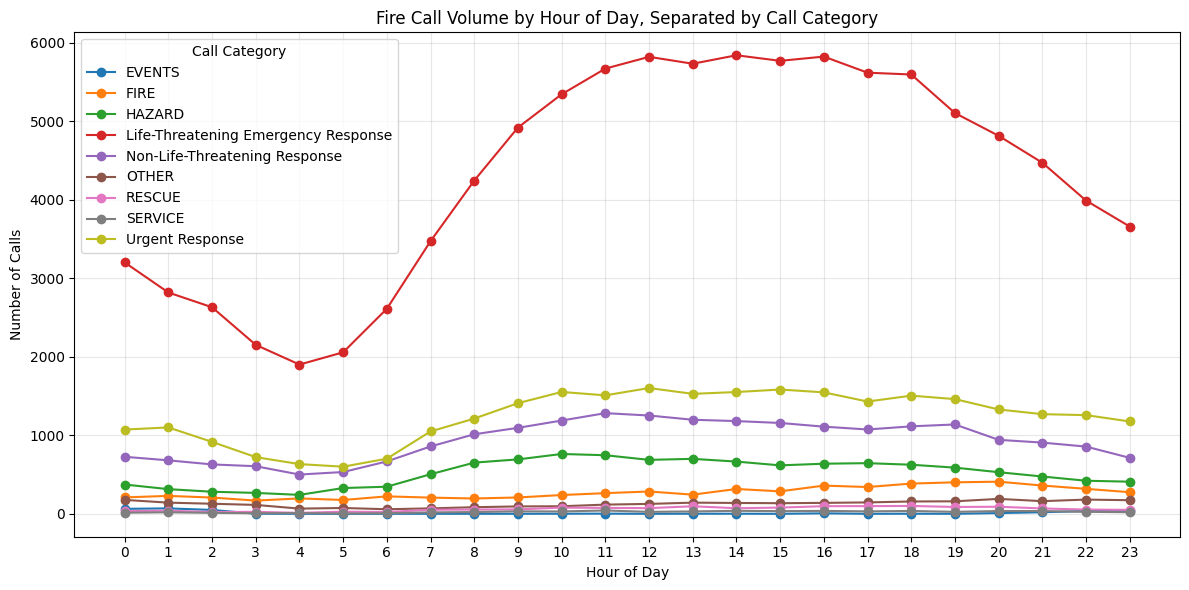

call_category,EVENTS,FIRE,HAZARD,Life-Threatening Emergency Response,Non-Life-Threatening Response,OTHER,RESCUE,SERVICE,Urgent Response
hour,,,,,,,,,
0,63,209,373,3202,726,177,34,14,1073
1,69,228,314,2819,681,142,39,19,1100
2,49,207,281,2631,629,128,23,12,916
3,1,168,266,2152,606,113,25,7,722
4,0,196,241,1901,500,66,12,9,633
5,0,176,328,2057,532,74,27,4,600
6,0,222,345,2612,667,58,23,7,702
7,0,206,504,3473,858,69,51,18,1049
8,0,195,652,4245,1013,84,54,22,1213


In [45]:
df['date_response'] = pd.to_datetime(df['date_response'], errors='coerce')
df['hour'] = df['date_response'].dt.hour
hour_category_counts = df.groupby(['hour', 'call_category']).size().unstack(fill_value=0)

#visualization fire call volume by hour of day and seperated by call category
plt.figure(figsize=(12,6))

for category in hour_category_counts.columns:
    plt.plot(hour_category_counts.index,
             hour_category_counts[category],
             marker='o',
             label=category)

plt.title("Fire Call Volume by Hour of Day, Separated by Call Category")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Calls")
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(title="Call Category")
plt.tight_layout()
plt.show()

hour_category_counts

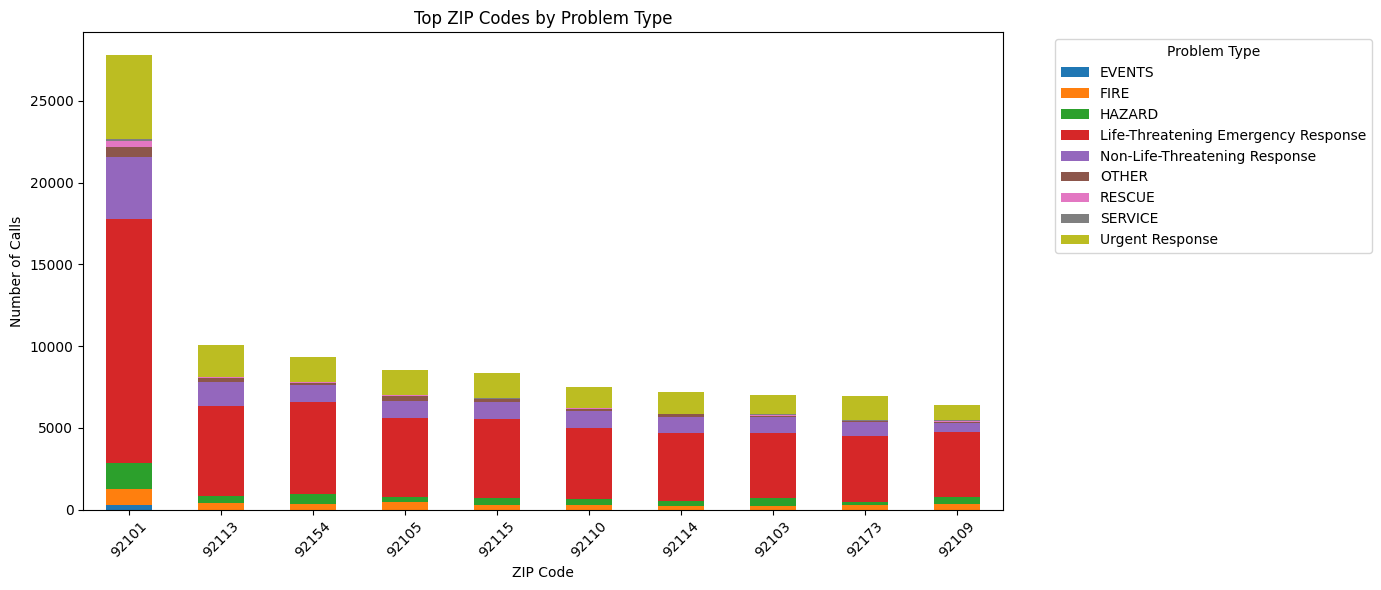

In [46]:
df['address_zip'] = df['address_zip'].astype(str).str.replace('.0', '', regex=False)

#problems by zip
zip_problem = df.groupby(['address_zip', 'problem']).size().unstack(fill_value=0)

#selecting topz ips
top_zips = zip_problem.sum(axis=1).sort_values(ascending=False).head(10)
zip_problem_top = zip_problem.loc[top_zips.index]


zip_problem_top.plot(kind='bar', stacked=True, figsize=(14,6))

plt.title("Top ZIP Codes by Problem Type")
plt.xlabel("ZIP Code")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45)
plt.legend(title="Problem Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

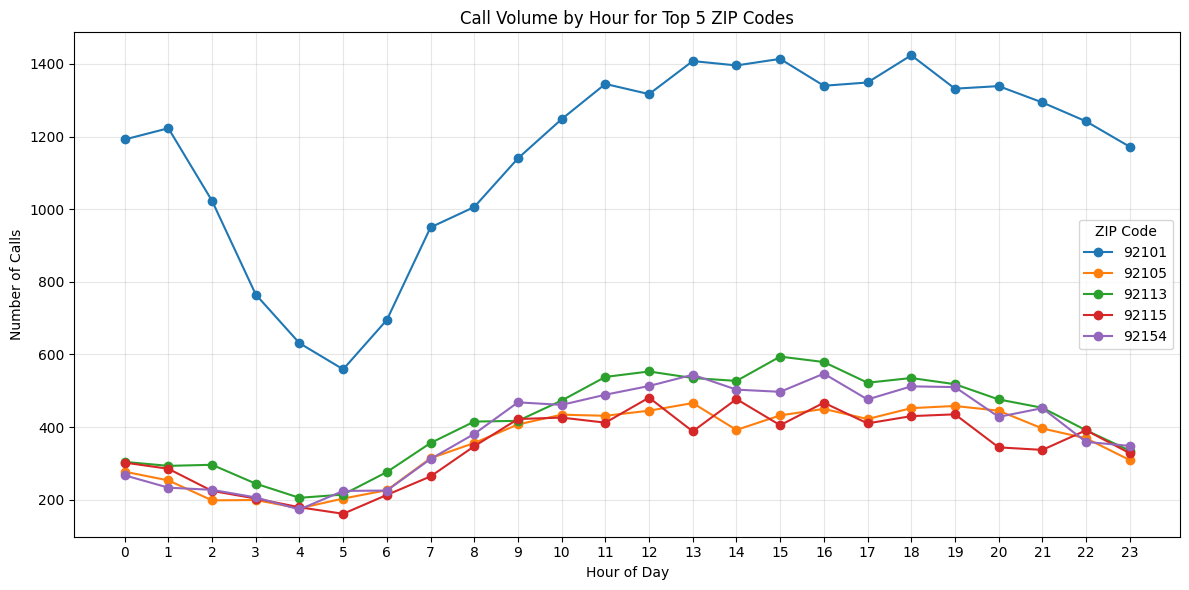

In [47]:
top_zip_codes = df['address_zip'].value_counts().head(5).index
df_top = df[df['address_zip'].isin(top_zip_codes)]
zip_hour_counts = df_top.groupby(['hour', 'address_zip']).size().unstack(fill_value=0)

#visualization line chart
plt.figure(figsize=(12,6))
for zipc in zip_hour_counts.columns:
    plt.plot(zip_hour_counts.index, zip_hour_counts[zipc], marker='o', label=zipc)

plt.title("Call Volume by Hour for Top 5 ZIP Codes")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Calls")
plt.xticks(range(0, 24))
plt.legend(title="ZIP Code")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

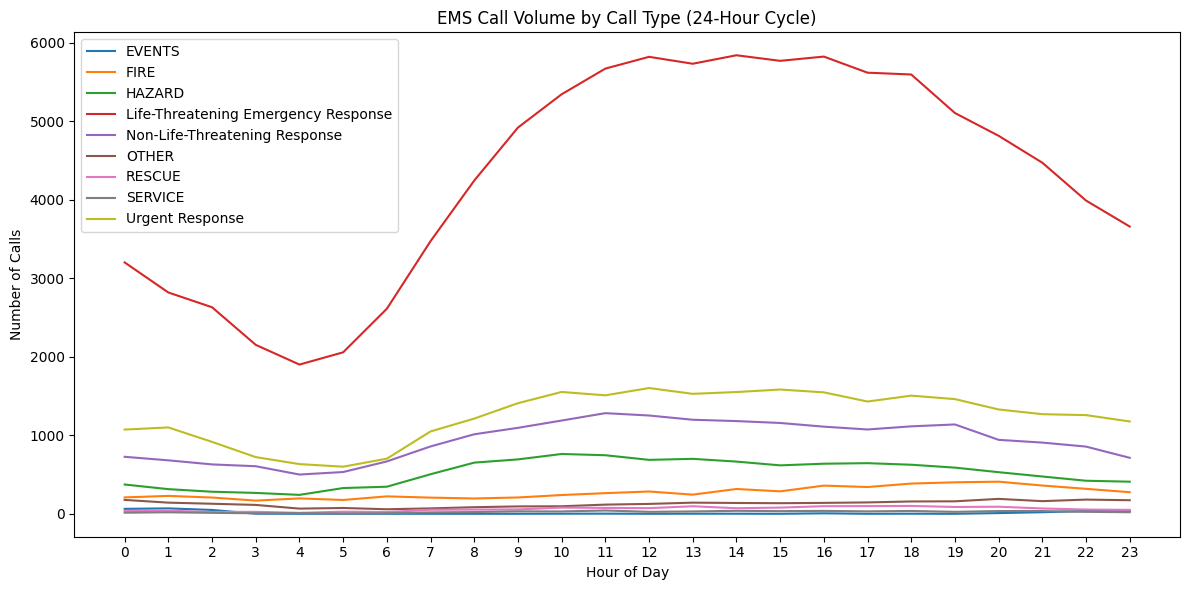

In [48]:
#group hour and call type
hourly_type = df.groupby(['hour', 'call_category']).size().reset_index(name='Count')

pivot_ht = hourly_type.pivot(index='hour', columns='call_category', values='Count').fillna(0)

plt.figure(figsize=(12,6))
for col in pivot_ht.columns:
    plt.plot(pivot_ht.index, pivot_ht[col], label=col)

plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Calls")
plt.title("EMS Call Volume by Call Type (24-Hour Cycle)")
plt.legend()
plt.tight_layout()
plt.show()

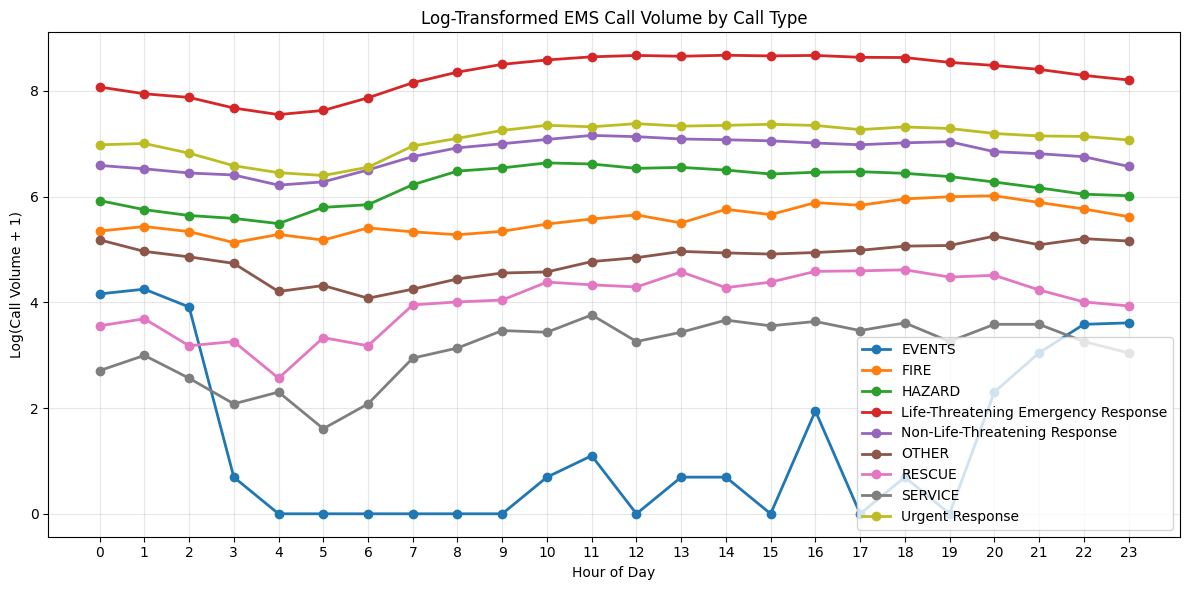

In [49]:
#group hour and call type
hourly_type = df.groupby(['hour', 'call_category']).size().reset_index(name='Count')
#log-transformed
hourly_type['LogCount'] = np.log1p(hourly_type['Count'])
pivot_log = hourly_type.pivot(index='hour', columns='call_category', values='LogCount').fillna(0)

plt.figure(figsize=(12,6))

#visualization/plot
for col in pivot_log.columns:
    plt.plot(pivot_log.index, pivot_log[col], marker='o', linewidth=2, label=col)

plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Log(Call Volume + 1)")
plt.title("Log-Transformed EMS Call Volume by Call Type")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3478182428.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['hour'] = df_top5['date_response'].dt.hour


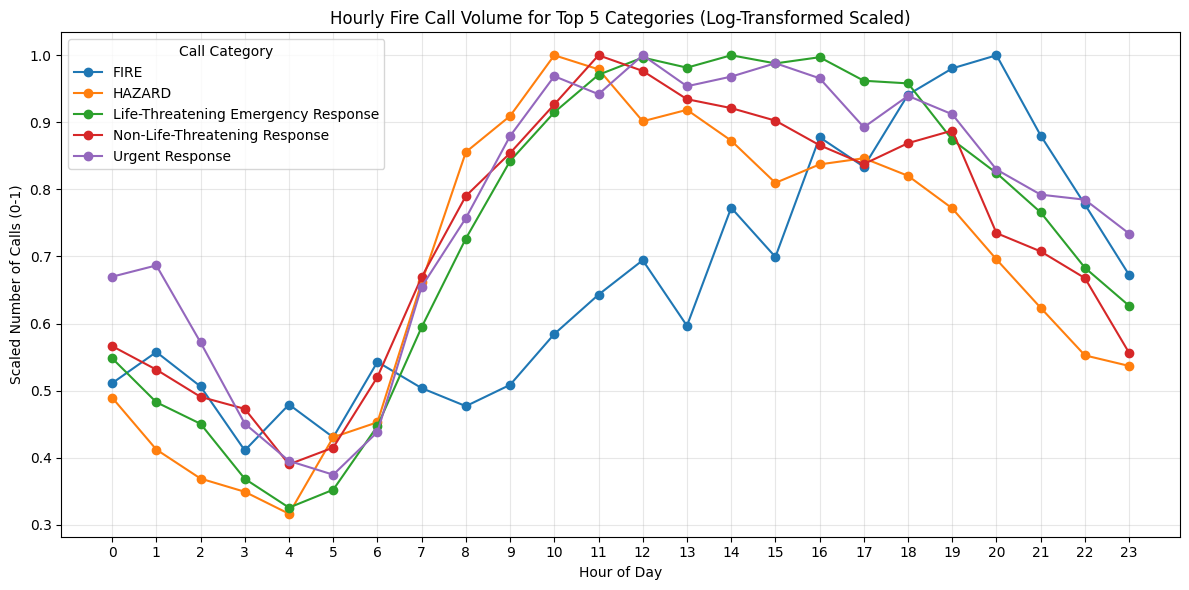

In [50]:
df['date_response'] = pd.to_datetime(df['date_response'], errors='coerce')
df['call_category'] = df['call_category'].astype(str).str.strip()

#count calls
category_counts = df['call_category'].value_counts()


top5_categories = category_counts.head(5).index
df_top5 = df[df['call_category'].isin(top5_categories)]
df_top5['hour'] = df_top5['date_response'].dt.hour
hourly_top5 = df_top5.groupby(['hour', 'call_category']).size().unstack(fill_value=0)

#scaling
hourly_scaled = hourly_top5.apply(lambda x: x / x.max(), axis=0)

#plotvisualization
plt.figure(figsize=(12,6))
for category in hourly_scaled.columns:
    plt.plot(hourly_scaled.index, hourly_scaled[category], marker='o', label=category)

plt.title("Hourly Fire Call Volume for Top 5 Categories (Log-Transformed Scaled)")
plt.xlabel("Hour of Day")
plt.ylabel("Scaled Number of Calls (0-1)")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend(title="Call Category")
plt.tight_layout()
plt.show()